##Tratamento de Dados

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/datasets/housing.csv', sep = ',')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [ ]:
df.isnull().sum()

,0
RM,0
LSTAT,0
PTRATIO,0
MEDV,0


In [ ]:
df.dtypes

,0
RM,float64
LSTAT,float64
PTRATIO,float64
MEDV,float64


In [ ]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


##Análise dos outliers

In [ ]:
import plotly.express as px

boxplot = px.box(df, y = "RM")
boxplot.show()

In [ ]:
boxplot = px.box(df, y = "LSTAT")
boxplot.show()

In [ ]:
boxplot = px.box(df, y = "PTRATIO")
boxplot.show()

In [ ]:
boxplot = px.box(df, y = "MEDV")
boxplot.show()

##Correlação Linear

In [ ]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


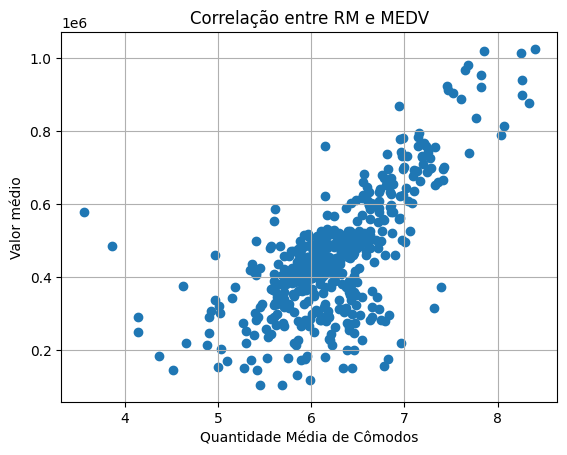

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.RM, df.MEDV)
plt.title("Correlação entre RM e MEDV")
plt.xlabel("Quantidade Média de Cômodos")
plt.ylabel("Valor médio")
plt.grid(True)

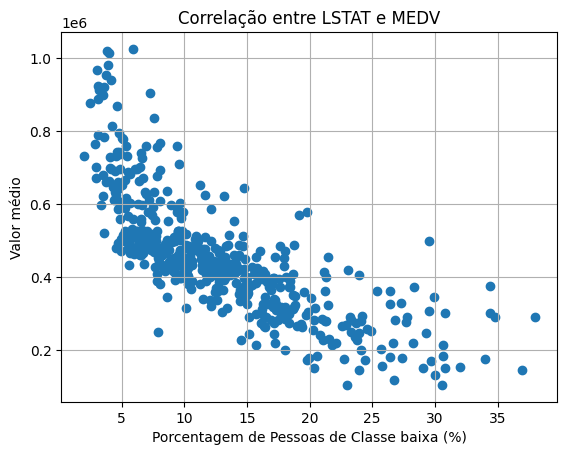

In [ ]:
plt.scatter(df.LSTAT, df.MEDV)
plt.title("Correlação entre LSTAT e MEDV")
plt.xlabel("Porcentagem de Pessoas de Classe baixa (%)")
plt.ylabel("Valor médio")
plt.grid(True)

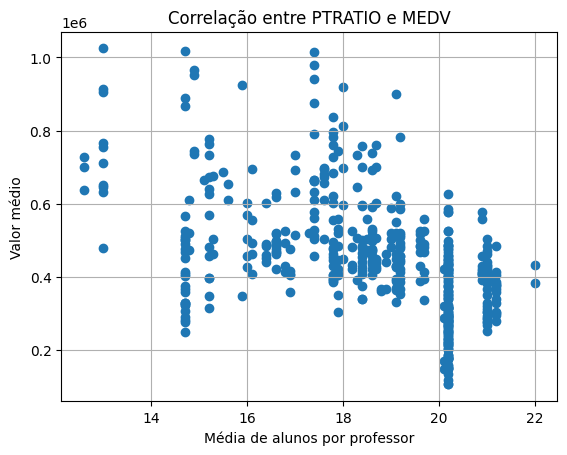

In [ ]:
plt.scatter(df.PTRATIO, df.MEDV)
plt.title("Correlação entre PTRATIO e MEDV")
plt.xlabel("Média de alunos por professor")
plt.ylabel("Valor médio")
plt.grid(True)

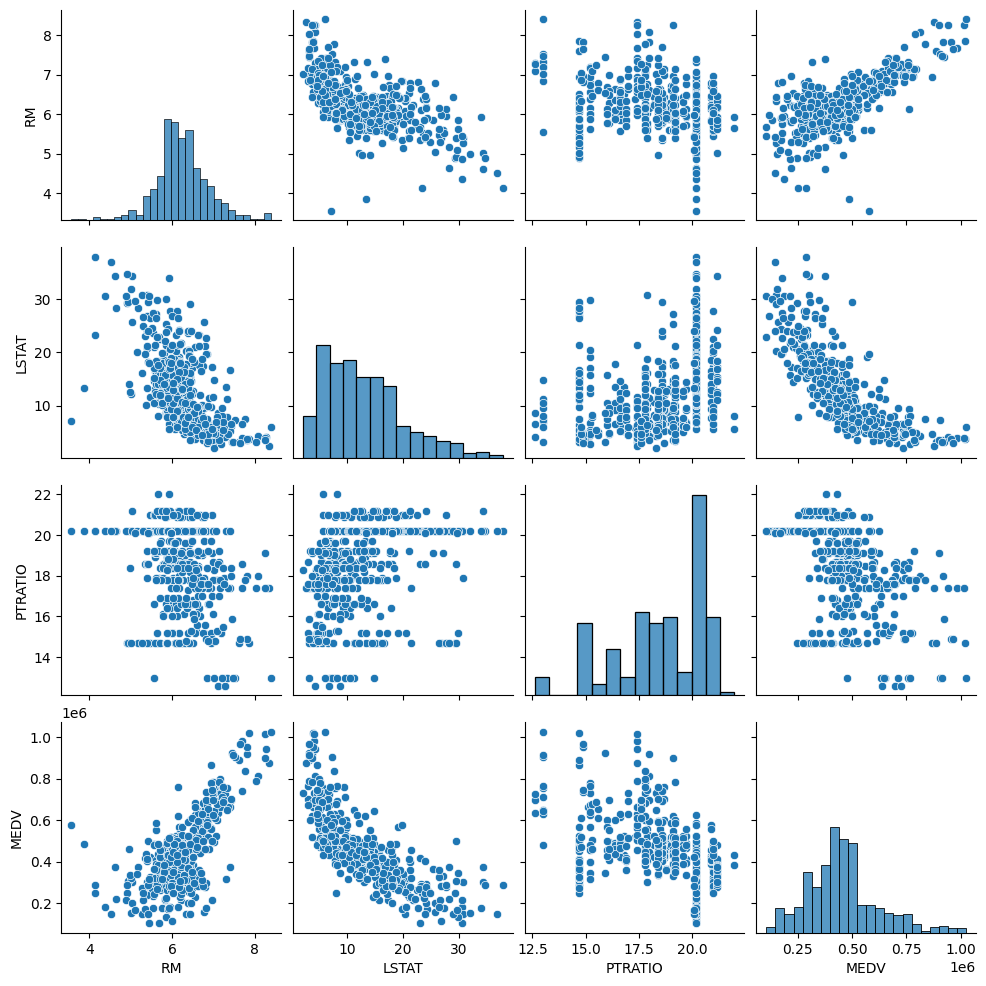

In [ ]:
import seaborn as sns

sns.pairplot(df)

##Análise da Normalidade

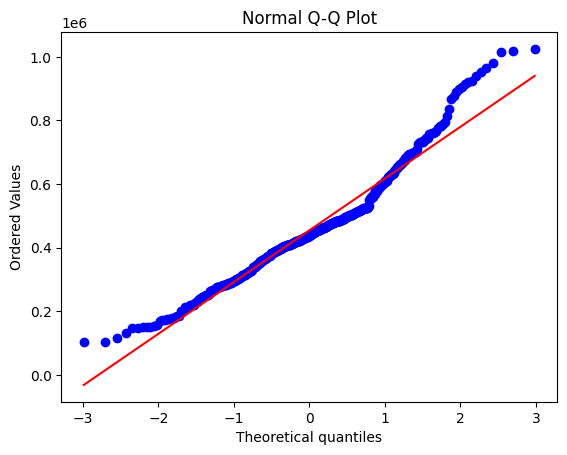

In [ ]:
import scipy.stats as stats

stats.probplot(df['MEDV'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [ ]:
import plotly.express as px

hist = px.histogram(df, x = "MEDV", nbins = 60)
hist.show()

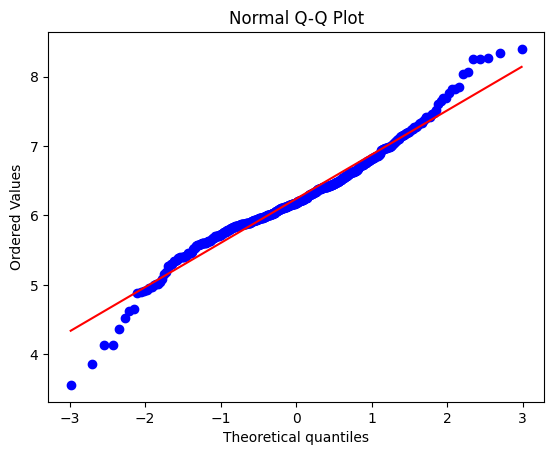

In [ ]:
stats.probplot(df['RM'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [ ]:
hist = px.histogram(df, x = "RM", nbins = 60)
hist.show()

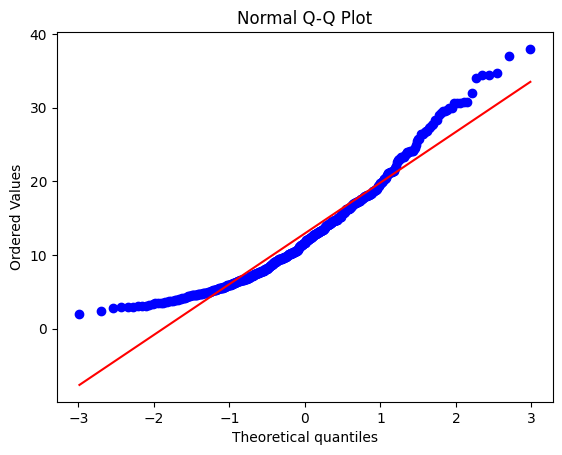

In [ ]:
stats.probplot(df['LSTAT'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [ ]:
hist = px.histogram(df, x = "LSTAT", nbins = 60)
hist.show()

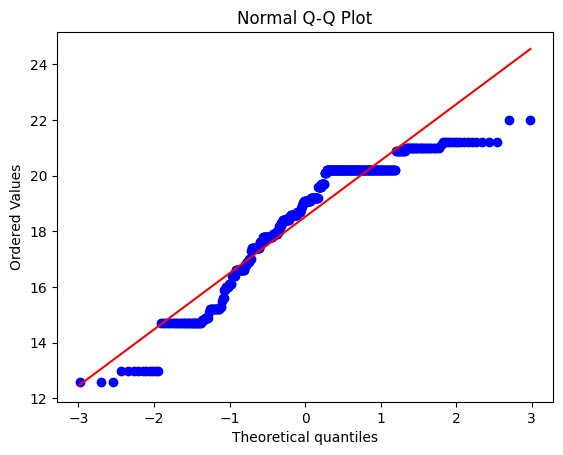

In [ ]:
stats.probplot(df['PTRATIO'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [ ]:
hist = px.histogram(df, x = "PTRATIO", nbins = 60)
hist.show()

##Teste Shapiro Wilk

H0 = distribuição normal: p > 0.05

Ha = distribuição != normal: p < 0.05

In [ ]:
stats.shapiro(df.MEDV)

ShapiroResult(statistic=0.9596616055953767, pvalue=2.5759801704018553e-10)

In [ ]:
estatistica, p = stats.shapiro(df.MEDV)
print("Valor da estatistica: {}".format(estatistica))
print("p valor: {}".format(p))

Valor da estatistica: 0.9596616055953767
p valor: 2.5759801704018553e-10


In [ ]:
estatistica, p = stats.shapiro(df.RM)
print("Valor da estatistica: {}".format(estatistica))
print("p valor: {}".format(p))

Valor da estatistica: 0.9708170375303297
p valor: 2.7090145811327798e-08


In [ ]:
estatistica, p = stats.shapiro(df.PTRATIO)
print("Valor da estatistica: {}".format(estatistica))
print("p valor: {}".format(p))

Valor da estatistica: 0.90647424903615
p valor: 9.064596547331122e-17


In [ ]:
estatistica, p = stats.shapiro(df.LSTAT)
print("Valor da estatistica: {}".format(estatistica))
print("p valor: {}".format(p))

Valor da estatistica: 0.9371757140975832
p valor: 1.689879707182205e-13


##Teste Lilliefors

H0 = distribuição normal: p > 0.05

Ha = distribuição != normal: p < 0.05

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.MEDV, dist = 'norm')
print('Valor da estatistica: {}'.format(estatistica))
print('p valor: {}'.format(p))

Valor da estatistica: 0.11370576407672117
p valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.RM, dist = 'norm')
print('Valor da estatistica: {}'.format(estatistica))
print('p valor: {}'.format(p))

Valor da estatistica: 0.06394344399233598
p valor: 0.0009999999999998899


##Spearman

In [ ]:
coef, p = stats.spearmanr(df.MEDV, df.RM)
print('Valor do coeficiente: {}'.format(coef))
print('p valor: {}'.format(p))

Valor do coeficiente: 0.6240572939087418
p valor: 3.845028634343325e-54


In [ ]:
correlacao = df.corr(method = 'spearman')
correlacao

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.624700,-0.282053,0.624057
LSTAT,-0.624700,1.000000,0.461739,-0.845527
PTRATIO,-0.282053,0.461739,1.000000,-0.559276
MEDV,0.624057,-0.845527,-0.559276,1.000000


<Axes: >

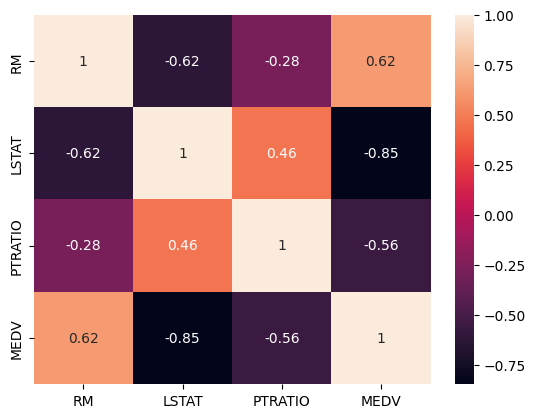

In [ ]:
plt.figure()
sns.heatmap(correlacao, annot = True)

##Pearson

In [ ]:
#coef, p = stats.pearsonr(df.MEDV, df.RM)
#print('Valor do coeficiente: {}'.format(coef))
#rint('p valor: {}'.format(p))

##Regressão com LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
independente = df.iloc[:, 0:3].values
dependente = df.iloc[:, 3].values

In [ ]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
lgbm = lgb.LGBMRegressor(num_leaves = 60, max_depth = 3, learning_rate = 0.1, n_estimators = 80)
lgbm.fit(x_treino, y_treino)

In [ ]:
lgbm.score(x_treino, y_treino)

0.8893163266944558

##Teste

In [ ]:
lgbm.score(x_teste, y_teste)

0.8215549565147177

In [ ]:
previsoes_teste = lgbm.predict(x_teste)

In [ ]:
valor_casa = lgbm.predict([[8, 12, 12]])
print(valor_casa)

[607159.14860173]


##Métricas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_teste, previsoes_teste)

55057.91594046354

In [ ]:
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

71954.08357587352

##Validação Cruzada

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = KFold(n_splits = 16, shuffle = True, random_state = 5)

In [ ]:
model = lgb.LGBMRegressor(num_leaves = 60, max_depth = 3, learning_rate = 0.1, n_estimators = 80)
results = cross_val_score(model, independente, dependente, cv = kfold)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 458, number of used features: 3
[LightGBM] [Info] Start training from score 454594.978166
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
print(results.mean() * 100.0)

81.6832174524297
